In [1]:
import pImpactR as impact
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy as copy
import pickle
np.set_printoptions(formatter={'float': lambda x: format(x, '1.2E')})

In [2]:
import pickle
lostp_data = pickle.load(open('lostp_data.QFF.pickle','rb'))

In [3]:
keys=list(lostp_data.keys())
keys

['Thermal.tau=0.4.CL=6.0',
 'Thermal.tau=0.3.CL=6.0',
 'Exponential.rmsMatched_from_tau=0.4.CL=6.0',
 'Exponential.rmsMatched_from_tau=0.3.CL=6.0',
 'Exponential.rmsMatched_from_tau=0.4_exceptEmittance.CL=6.0',
 'Exponential.rmsMatched_from_tau=0.3_exceptEmittance.CL=6.0']

In [4]:
aperture = np.loadtxt('pipeinfo.in')
L=aperture[-1,0]

In [5]:
ap0_x,ap0_y = 0.00680513, 0.00935705
ap1_x,ap1_y = 4.00000000e-03, 5.50000000e-03
ang = np.arange(0.0,2*np.pi,2*np.pi/1024)
c = np.cos(ang)
s = np.sin(ang)

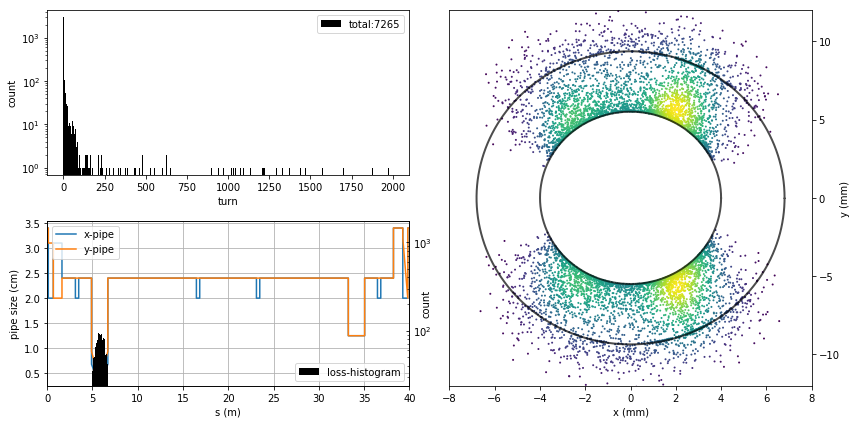

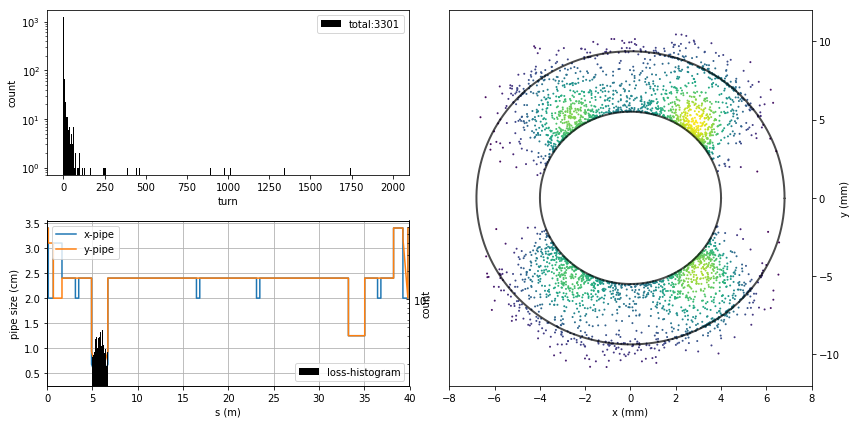

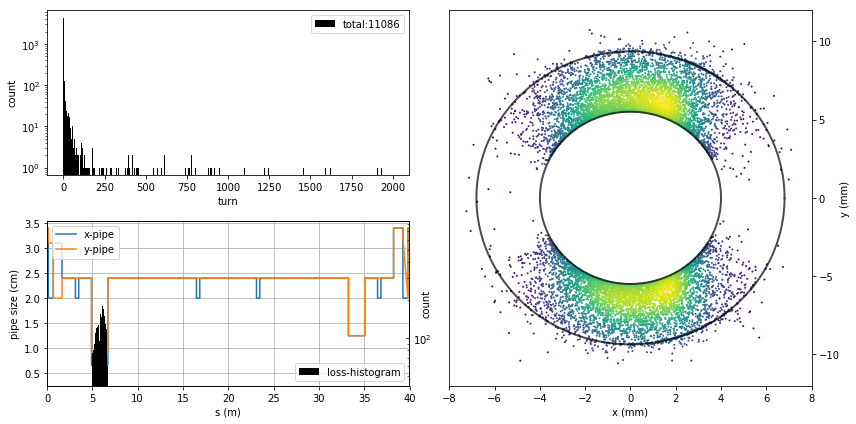

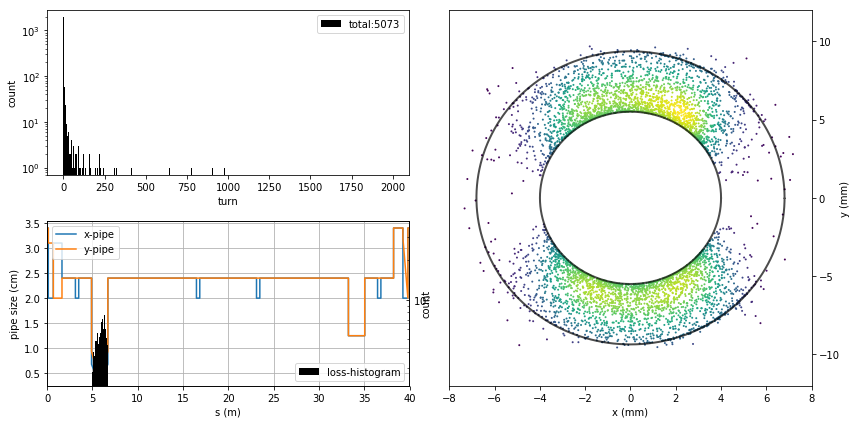

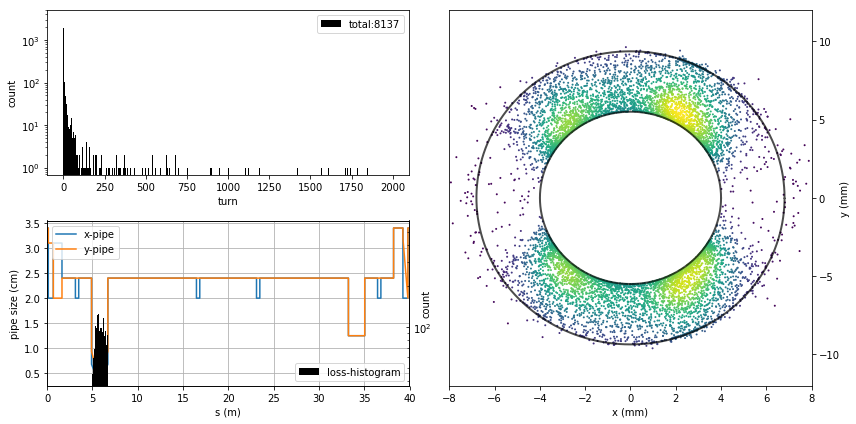

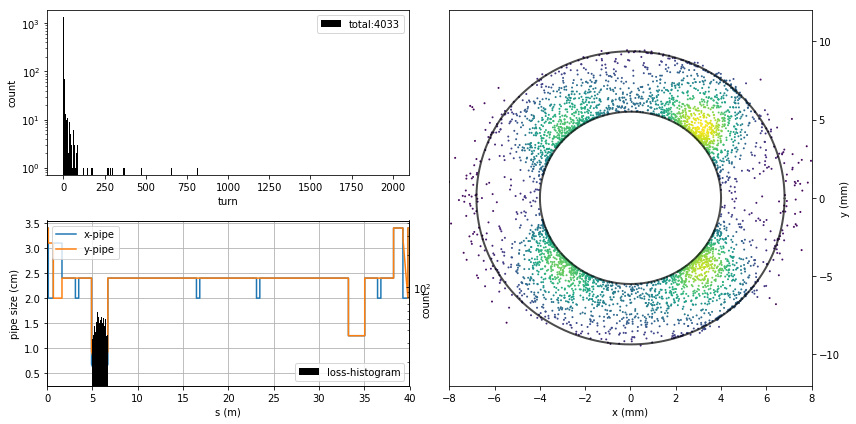

In [6]:
for key in keys:
    data = lostp_data[key]
    islost1 = len(data['pLost'].shape)==1
    if islost1:
        nlost=1
    else:
        nlost = len(data['pLost'])

    plt.figure(figsize=(12,6))


    plt.subplot(221)
    if islost1:
        plt.hist(data['pLost'][0]/L,bins=2000,range=(0,2000),color='k')
    else:
        plt.hist(data['pLost'][:,0]/L,bins=2000,range=(0,2000),color='k')
    plt.yscale('log')
    plt.legend(['total:'+str(nlost)])
    plt.xlabel('turn')
    plt.ylabel('count')


    plt.subplot(223)
    plt.plot(aperture[:,0],aperture[:,1]*100)
    plt.plot(aperture[:,0],aperture[:,2]*100)
    plt.legend(['x-pipe','y-pipe'],loc=2)
    plt.xlim(0,L)
    plt.ylabel('pipe size (cm)')
    plt.grid()
    plt.xlabel('s (m)')
    ax=plt.twinx()
    if islost1:
        plt.hist(np.mod(data['pLost'][0],L),bins=90,color='k');
    else:
        plt.hist(np.mod(data['pLost'][:,0],L),bins=90,color='k');
    plt.yscale('log')
    plt.ylabel('count')
    ax.yaxis.labelpad = -10
    plt.legend(['loss-histogram'],loc=4)
    plt.tick_params(which='both',direction='in')
    # plt.xlim(3,8)


    ax=plt.subplot(122)
    # alpha = np.min([1,10000/nlost])
    plt.plot(1000*ap0_x*c,1000*ap0_y*s,alpha=0.7,c='k',lw=2)
    plt.plot(1000*ap1_x*c,1000*ap1_y*s,alpha=0.7,c='k',lw=2)
    if islost1:
        plt.scatter(1000*data['pLost'][1],1000*data['pLost'][2])
    else:
        impact.plot.density(1000*data['pLost'][:,1],1000*data['pLost'][:,2])    
    # plt.scatter(data['pLost'][:,1],data['pLost'][:,2],s=1.0,alpha=alpha)
    plt.xlim(- 8, 8)
    plt.ylim(-12,12)
    plt.xlabel('x (mm)')
    plt.ylabel('y (mm)')
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    ax.yaxis.labelpad = 0

    plt.tight_layout()
    plt.savefig(key+'.png',dpi=180)